# Horizon Investments - Loan Default Predictor

Financial institutions require background information to evaluate applicants for loan approval properly. 
Lending money is a revenue source for financial institutions; however, there’s a major risk associated with it as a borrower can default on a loan. Based on deterministic factors such as the borrower’s income, credit history, and property value, a financial institution can assess if a borrower is likely to default on a loan. 
Using an artificial neural network (ANN), borrower's data from a fictional investment firm will be analyzed to categorize if a borrower is likely to default on a loan 



## Data Description
**ID:** client loan application id

**Year:** year of loan application

**Loan Limit:** indicates whether the loan is conforming (cf) or non-conforming (ncf)

**Gender:**	gender of the applicant (male, female, joint, sex not available)

**Approv_in_adv:** indicates whether the loan was approved in advance (pre, nopre)

**Loan_type:** type of loan (type1, type2, type3)

**Loan_purpose:** purpose of the loan (p1, p2, p3, p4)

**Credit_Worthiness:** credit worthiness (l1, l2)

**Open_credit:** indicates whether the applicant has any open credit accounts (opc, nopc)

**Business_or_commercial:** indicates whether the loan is for business/commercial purposes (ob/c - business/commercial,nob/c - personal) loan_amount amount of money being borrowed

**Rate_of_interest:** interest rate charged on the loan

**Interest_rate_spread:** difference between the interest rate on the loan and a benchmark interest rate

**Upfront_charges:** initial charges associated with securing the loan

**Term:**  duration of the loan in months

**Neg_ammortization:**	indicates whether the loan allows for negative ammortization (neg_amm, not_neg)

**Interest_only:** indicates whether the loan has an interest-only payment option (int_only, not_int)

**Lump_sum_payment:** indicates if a lump sum payment is required at the end of the loan term (lpsm, not_lpsm)

**Property_value:** value of the property being financed

**Construction_type:** type of construction (sb - site built, mh - manufactured home)

**Occupancy_type:** occupancy type (pr - primary residence, sr- secondary residence, ir - investment property)

**Secured_by:** specifies the type of collateral securing the loan (home, land)

**Total_units:** number of units in the property being financed (1U, 2U, 3U, 4U)

**Income:** applicant's annual income

**Credit_type:** applicant's type of credit (CIB - credit information bureau , CRIF - CIRF credit information 
bureau, EXP - experian , EQUI - equifax)

**Credit_Score:** applicant's credit score

**Co-applicant_credit_type:** co-applicant's type of credit (CIB - credit information bureau EXP - experian)

**Age:** the age of the applicant.

**Submission_of_application:** indicates how the application was submitted (to_inst - to institution, not_inst - not to institution)

**LTV:** loan-to-value ratio, calculated as the loan amount divided by the property value

**Region:** geographic region where the property is located (North, south, central, North-East)

**Security_Type:**	type of security or collateral backing the loan (direct, indirect)

**Status:** indicates whether the loan has been defaulted (1) or not (0)

**dtir1:** debt-to-income ratio

***Data Source:*** *https://www.kaggle.com/datasets/yasserh/loan-default-dataset* 

## EDA 

Before starting on a predictive model, we need to explore our data and determine if there are any missing values that will impact our model.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Loan_Default.csv')

In [4]:
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,1.735590e+05
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2.019000e+03
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3.576500e+06
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.000000e+00
Interest_rate_spread,112031.0,0.441656,0.513043,-3.638000,0.07600,0.39040,0.775400,3.357000e+00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,6.000000e+04
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,3.600000e+02
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,1.650800e+07
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,5.785800e+05
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,9.000000e+02


Since all values in the _year_ column are the same, this column can be dropped. Similarly, the _ID_ column is a unique identifier and can be dropped - the index columns will be used as identifiers instead.

In [7]:
df = df.drop(['year','ID'],axis = 1)

In [8]:
df.isna().sum().sort_values(ascending = True)

lump_sum_payment                 0
co-applicant_credit_type         0
total_units                      0
Secured_by                       0
occupancy_type                   0
construction_type                0
Status                           0
interest_only                    0
credit_type                      0
Region                           0
Credit_Score                     0
loan_amount                      0
business_or_commercial           0
open_credit                      0
Credit_Worthiness                0
loan_type                        0
Gender                           0
Security_Type                    0
term                            41
Neg_ammortization              121
loan_purpose                   134
age                            200
submission_of_application      200
approv_in_adv                  908
loan_limit                    3344
income                        9150
property_value               15098
LTV                          15098
dtir1               

There are several missing values in different categories. Featuring engineering can be performed to fill missing values. The _term_ column holds values of the length of loan in months. The average length of a loan can be used to fill in the missing values. 

In [9]:
df['term'] = df['term'].fillna(int(df['term'].mean()))

In [10]:
df.isna().sum().sort_values(ascending = True)

lump_sum_payment                 0
co-applicant_credit_type         0
total_units                      0
Secured_by                       0
occupancy_type                   0
construction_type                0
Status                           0
interest_only                    0
term                             0
credit_type                      0
Credit_Score                     0
Security_Type                    0
loan_amount                      0
business_or_commercial           0
open_credit                      0
Credit_Worthiness                0
loan_type                        0
Gender                           0
Region                           0
Neg_ammortization              121
loan_purpose                   134
age                            200
submission_of_application      200
approv_in_adv                  908
loan_limit                    3344
income                        9150
property_value               15098
LTV                          15098
dtir1               

Next, there are several categorical values that cannot be interpreted by a neural network. Therefore, this variables will transformed to numerical values using the Pandas _get_dummies_ method. 

In [11]:
df = pd.get_dummies(df,
                    columns=['loan_limit','Gender','approv_in_adv','loan_type','loan_purpose',
                             'Credit_Worthiness','open_credit','business_or_commercial','Neg_ammortization','interest_only',
                             'lump_sum_payment','construction_type',
                             'occupancy_type','Secured_by','total_units','credit_type',
                             'co-applicant_credit_type','age','submission_of_application','Region','Security_Type'],
                    dtype = int,drop_first=True)

In [12]:
df.isna().sum().sort_values(ascending = False)

Upfront_charges                      39642
Interest_rate_spread                 36639
rate_of_interest                     36439
dtir1                                24121
LTV                                  15098
property_value                       15098
income                                9150
total_units_4U                           0
credit_type_EXP                          0
credit_type_EQUI                         0
credit_type_CRIF                         0
loan_amount                              0
total_units_3U                           0
age_35-44                                0
total_units_2U                           0
Secured_by_land                          0
co-applicant_credit_type_EXP             0
age_65-74                                0
age_45-54                                0
age_55-64                                0
occupancy_type_pr                        0
age_<25                                  0
age_>74                                  0
submission_

The remaining columns are all of numerical type. Since there's a large of number of entries missing one or more values, is not appropriate to simply drop the columns. Instead, we can perfrom imputation on each column to fill in the missing values with an estimated values. 

To perform this task, KNNImputer will be used. This will allow for the imputer algorithm to evaluate the relation between multiple columns to find a relation to a missing value using Eucledian distance. It is important to note that while _LTV_ has missing values, the _loan-to-value_ ratio can be calculated as the total loan amount divided by the property value. Therefore, the _LTV_ column will be excluded from imputation. 

In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer(n_neighbors=5).set_output(transform = 'pandas')

In [15]:
df_temp = df[['loan_amount','rate_of_interest','Interest_rate_spread',
       'Upfront_charges','term', 'property_value','income','Credit_Score',
       'dtir1','loan_limit_ncf','Gender_Joint',
       'Gender_Male','Gender_Sex Not Available','approv_in_adv_pre',
       'loan_type_type2','loan_type_type3','loan_purpose_p2',
       'loan_purpose_p3','loan_purpose_p4','Credit_Worthiness_l2',
       'open_credit_opc','business_or_commercial_nob/c',
       'Neg_ammortization_not_neg','interest_only_not_int',
       'lump_sum_payment_not_lpsm','construction_type_sb',
       'occupancy_type_pr','occupancy_type_sr','Secured_by_land',
       'total_units_2U','total_units_3U','total_units_4U',
       'credit_type_CRIF','credit_type_EQUI','credit_type_EXP',
       'co-applicant_credit_type_EXP','age_35-44','age_45-54','age_55-64',
       'age_65-74','age_<25','age_>74','submission_of_application_to_inst',
       'Region_North-East','Region_central','Region_south',
       'Security_Type_direct']]

In [16]:
df_temp2 = imputer.fit_transform(df_temp)

In [17]:
df_temp2.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,dtir1,loan_limit_ncf,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500.0,3.600,-0.02712,1056.634,360.0,118000.0,1740.0,758.0,45.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
1,206500.0,3.721,0.50110,1127.508,360.0,238000.0,4980.0,552.0,36.4,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,406500.0,4.560,0.20000,595.000,360.0,508000.0,9480.0,834.0,46.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,456500.0,4.250,0.68100,1089.738,360.0,658000.0,11880.0,587.0,42.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,696500.0,4.000,0.30420,0.000,360.0,758000.0,10440.0,602.0,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
df_temp2.isna().sum().sort_values(ascending = False)

loan_amount                          0
co-applicant_credit_type_EXP         0
occupancy_type_pr                    0
occupancy_type_sr                    0
Secured_by_land                      0
total_units_2U                       0
total_units_3U                       0
total_units_4U                       0
credit_type_CRIF                     0
credit_type_EQUI                     0
credit_type_EXP                      0
age_35-44                            0
lump_sum_payment_not_lpsm            0
age_45-54                            0
age_55-64                            0
age_65-74                            0
age_<25                              0
age_>74                              0
submission_of_application_to_inst    0
Region_North-East                    0
Region_central                       0
Region_south                         0
construction_type_sb                 0
interest_only_not_int                0
rate_of_interest                     0
Gender_Male              

In [19]:
for i in range(0,len(df)):
    if pd.isna(df['LTV'][i]):
        df['LTV'][i] = df_temp2['loan_amount'][i]/df_temp2['property_value'][i]

In [20]:
df_final = pd.concat([df_temp2,df[['LTV','Status']]],axis = 1)

In [21]:
df_final.head()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,dtir1,loan_limit_ncf,...,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct,LTV,Status
0,116500.0,3.600,-0.02712,1056.634,360.0,118000.0,1740.0,758.0,45.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,98.728814,1
1,206500.0,3.721,0.50110,1127.508,360.0,238000.0,4980.0,552.0,36.4,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.867647,1
2,406500.0,4.560,0.20000,595.000,360.0,508000.0,9480.0,834.0,46.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,80.019685,0
3,456500.0,4.250,0.68100,1089.738,360.0,658000.0,11880.0,587.0,42.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69.376900,0
4,696500.0,4.000,0.30420,0.000,360.0,758000.0,10440.0,602.0,39.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,91.886544,0


In [22]:
df_final.isna().sum().sort_values(ascending = False)

loan_amount                          0
construction_type_sb                 0
occupancy_type_sr                    0
Secured_by_land                      0
total_units_2U                       0
total_units_3U                       0
total_units_4U                       0
credit_type_CRIF                     0
credit_type_EQUI                     0
credit_type_EXP                      0
co-applicant_credit_type_EXP         0
age_35-44                            0
age_45-54                            0
age_55-64                            0
age_65-74                            0
age_<25                              0
age_>74                              0
submission_of_application_to_inst    0
Region_North-East                    0
Region_central                       0
Region_south                         0
Security_Type_direct                 0
LTV                                  0
occupancy_type_pr                    0
lump_sum_payment_not_lpsm            0
rate_of_interest         

All missing values are now filled in. For the purpose of consistancy, all columns will be renamed to start with lowercase. 

In [23]:
df_final.columns = ['loan_amount', 'rate_of_interest', 'interest_rate_spread',
       'upfront_charges', 'term', 'property_value', 'income', 'credit_score',
       'dtir1', 'loan_limit_ncf', 'gender_joint', 'gender_male',
       'gender_sex not available', 'approv_in_adv_pre', 'loan_type_type2',
       'loan_type_type3', 'loan_purpose_p2', 'loan_purpose_p3',
       'loan_purpose_p4', 'credit_Worthiness_l2', 'open_credit_opc',
       'business_or_commercial_nob/c', 'neg_ammortization_not_neg',
       'interest_only_not_int', 'lump_sum_payment_not_lpsm',
       'construction_type_sb', 'occupancy_type_pr', 'occupancy_type_sr',
       'Secured_by_land', 'total_units_2U', 'total_units_3U', 'total_units_4U',
       'credit_type_CRIF', 'credit_type_EQUI', 'credit_type_EXP',
       'co-applicant_credit_type_EXP', 'age_35-44', 'age_45-54', 'age_55-64',
       'age_65-74', 'age_<25', 'age_>74', 'submission_of_application_to_inst',
       'region_north-east', 'region_central', 'region_south',
       'security_type_direct', 'LTV', 'status']

## Data Visualization


To help understand the relation between data, we'll create some visual representations. 

Text(0.5, 1.0, 'Loan Amount Distribution')

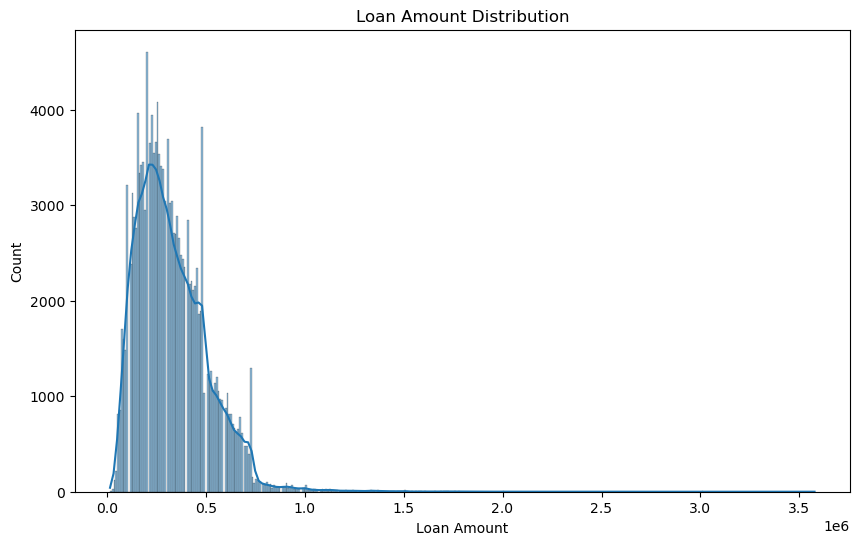

In [24]:
plt.figure(figsize = (10,6))
sns.histplot(df,x = 'loan_amount',kde = True)
plt.xlabel('Loan Amount')
plt.title('Loan Amount Distribution')

Text(0.5, 1.0, 'Credit Score Distribution')

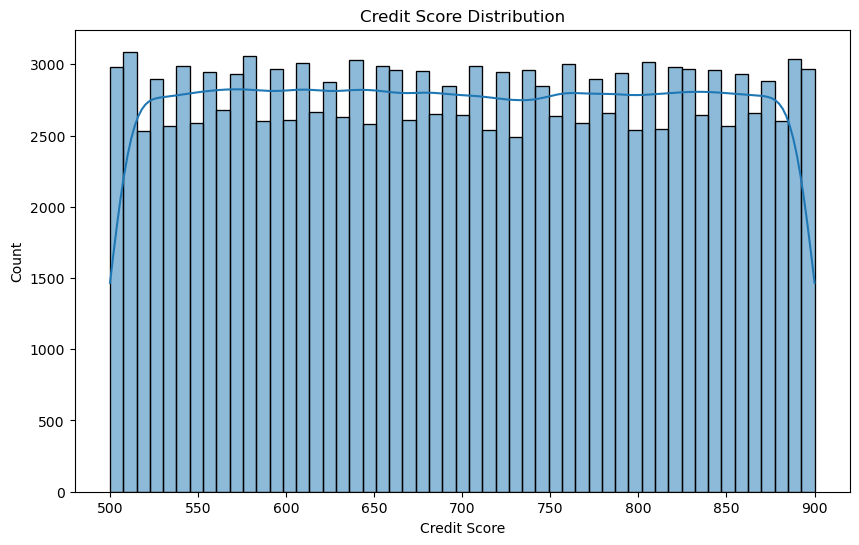

In [25]:
plt.figure(figsize = (10,6))
sns.histplot(df, x = 'Credit_Score',kde = True )
plt.xlabel('Credit Score')
plt.title('Credit Score Distribution')

Text(0.5, 1.0, 'Interest Rate Spread')

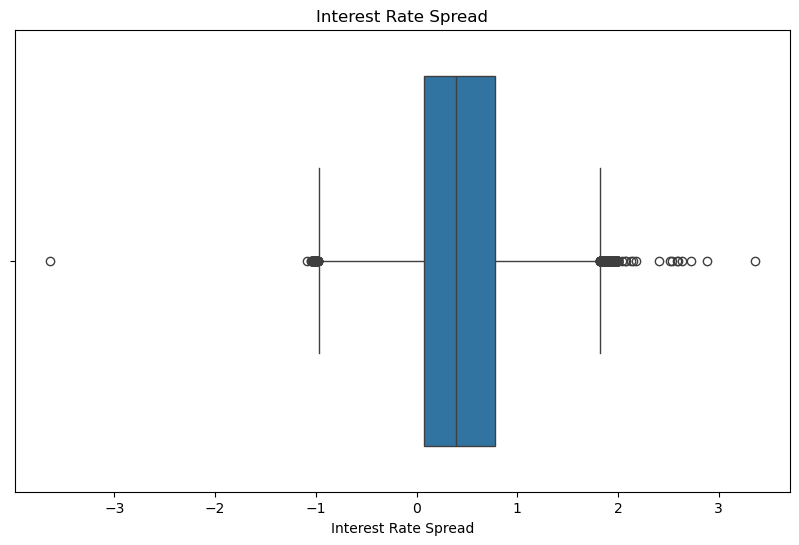

In [26]:
plt.figure(figsize = (10,6))
sns.boxplot(x = df['Interest_rate_spread'])
plt.xlabel('Interest Rate Spread')
plt.title('Interest Rate Spread')

Text(0.5, 1.0, 'Loan Duration in Months')

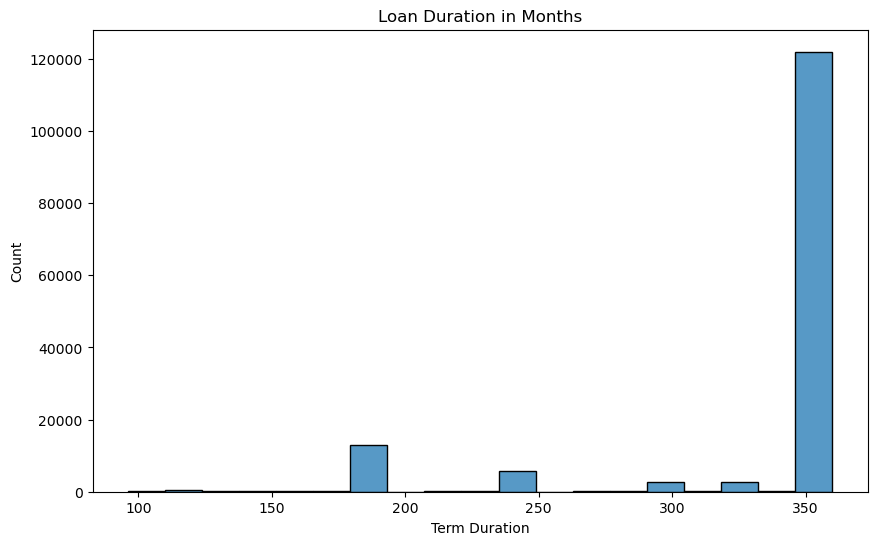

In [27]:
plt.figure(figsize= (10,6))
sns.histplot(df,x = 'term')
plt.xlabel('Term Duration')
plt.title('Loan Duration in Months')

Text(0.5, 1.0, 'Loan Amount vs Interest Rate')

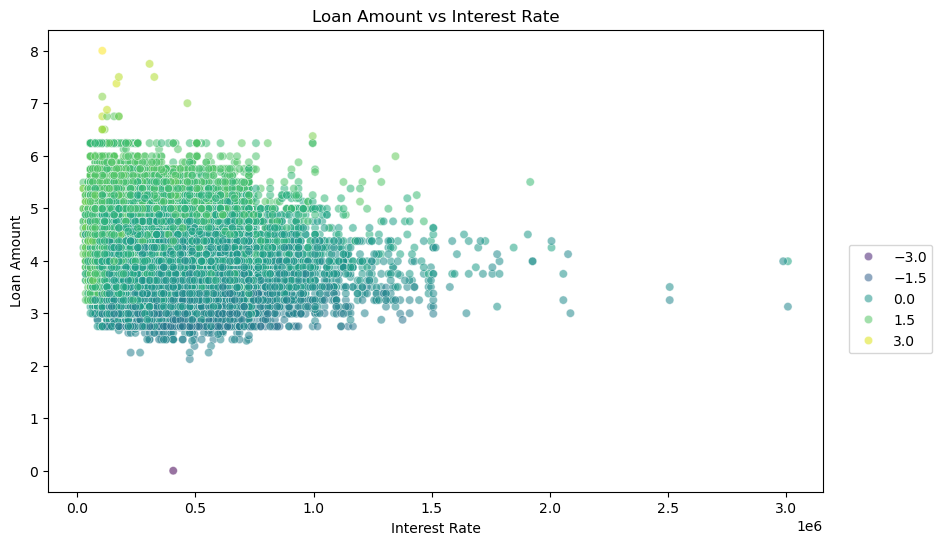

In [28]:
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = 'loan_amount',y = 'rate_of_interest',hue = 'Interest_rate_spread',palette = 'viridis',alpha = 0.55)
plt.legend(bbox_to_anchor = (1.15,.55))
plt.xlabel('Interest Rate')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Interest Rate')

Text(0.5, 1.0, 'Property Value vs Loan Amount')

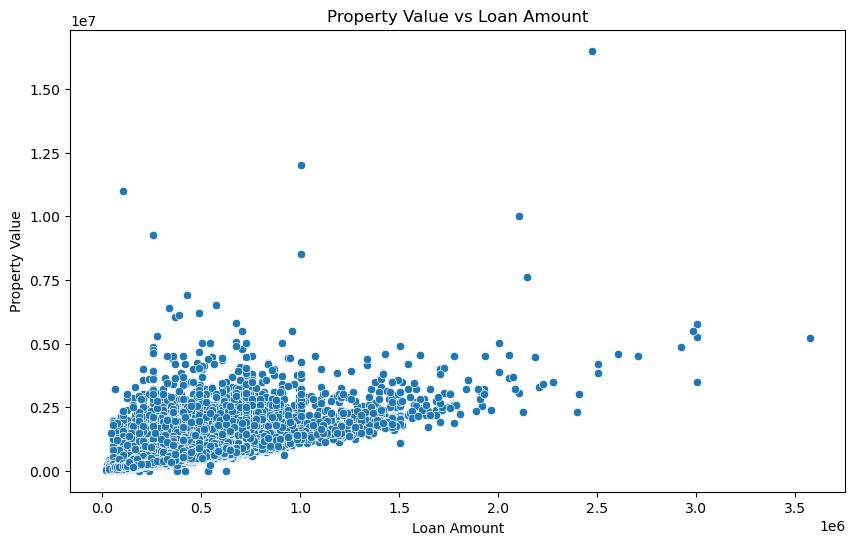

In [29]:
plt.figure(figsize = (10,6))
sns.scatterplot(df, x = 'loan_amount',y = 'property_value')
plt.xlabel('Loan Amount')
plt.ylabel('Property Value')
plt.title('Property Value vs Loan Amount')

## Neural Network Model


After creating graphics to understand key relations, we can fit and train a neural network. The target variable is _status_.  

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [31]:
X = df_final.drop('status',axis = 1).values
y = df_final['status'].values

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Since our data is varies in range, a scaler must be used. We will use _MinMaxScaler_. 

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

2024-08-11 21:54:10.643196: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [36]:
from tensorflow.keras.callbacks import TensorBoard
# Define the log directory for TensorBoard
log_dir = "logs/fit/"

# Create a callback for TensorBoard
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

### Model Training

Our neural network will be a feed foward network. In this case, the model consist of three hidden layers decreasing in neuron size of 25, 15, and 5 neurons. The initial and hidden layers use a rectified linear unit function (_relu_). The last layer will use a _sigmoid_ activation function. 

As the network is trained, we want to minimized the validation loss. The model is charaterized with a patience of 25 epochs to minimize validation loss compared to the test data. 

In [37]:
model = Sequential()
model.add(Dense(34,activation = 'relu'))
model.add(Dense(25,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [38]:
model.fit(x=X_train,
          y=y_train,
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop,tensorboard_callback],
          batch_size = 256
          )

Epoch 1/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7804 - loss: 0.4898 - val_accuracy: 0.8702 - val_loss: 0.3365
Epoch 2/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3282 - val_accuracy: 0.8737 - val_loss: 0.3209
Epoch 3/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3129 - val_accuracy: 0.8830 - val_loss: 0.3083
Epoch 4/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8806 - loss: 0.3088 - val_accuracy: 0.8827 - val_loss: 0.3035
Epoch 5/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8833 - loss: 0.3024 - val_accuracy: 0.8829 - val_loss: 0.3007
Epoch 6/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.2994 - val_accuracy: 0.8840 - val_loss: 0.3030
Epoch 7/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - loss: 0.2910 - val_accuracy: 0.8861 - val_loss: 0.2981
Epoch 8/600
407/407 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - loss: 0.2873 - val_accu

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 34)             │         1,666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 25)             │           875 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,053 (35.37 KB)

 Trainable params: 3,017 (11.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,036 (23.58 KB)

### Model Evaluation

Now that the model is trained, we can use _SciKit_ to report error metrics.

In [40]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

In [41]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

1394/1394 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step


In [42]:
print(confusion_matrix(y_test,predictions))

[[32453  1284]
 [ 1799  9065]]


In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     33737
           1       0.88      0.83      0.85     10864

    accuracy                           0.93     44601
   macro avg       0.91      0.90      0.90     44601
weighted avg       0.93      0.93      0.93     44601



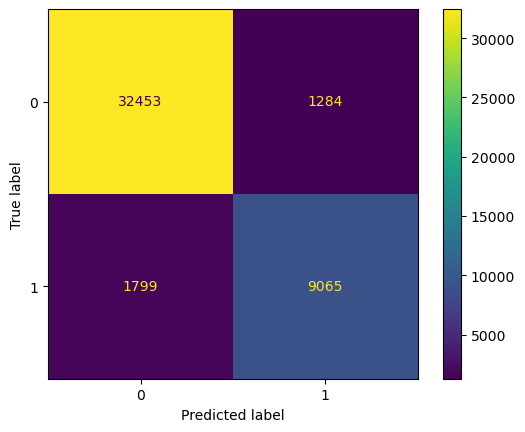

In [44]:
ConfusionMatrixDisplay(confusion_matrix(y_test,predictions)).plot()

The model accurately predicts roughly 94% of defaults of loans. Based on imputations and other feature engineering, the model can be properly applied to determine if an applicant is likely to defasult on their loan. 

## Model Visualization 

The Tensorboard feature is available below to show the training and validation loss of the model along additional insight. 

In [45]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

## Future Steps 

Several recommendations can be made to improve the model and improve its accuracy:

__Complete Data Entries:__ Up to 16% of information was missing on the original data frame. If more barrower's data is added - with no missing values - the imputation algorithm will have higher accuracy thus translating to the final neural network being fed better initial data. 

__Required Data:__ The financial institution can make some parameters required to be reported - for instance, requiring the borrower's annual income to be reported. 

__Increase Training:__ Increasing the model's complexity may improve the overall accuracy. For examples, comparing the number of hidden layers or increasing the number of neighbors required for classification. 